<a href="https://colab.research.google.com/github/jjonhwa/DeepLearning.AI-TensorFlow/blob/main/23_Course_3_Week_3_Lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
-O /tmp/sarcasm.json

--2021-01-09 05:01:45--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 172.217.214.128, 108.177.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.07s   

2021-01-09 05:01:45 (76.5 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [4]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [5]:
with open('/tmp/sarcasm.json', 'r') as f :
  datastore = json.load(f)

sentences = []
labels = []
urls = []

for item in datastore :
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [6]:
training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size :]

training_labels = labels[:training_size]
testing_labels = labels[training_size : ]

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(training_sequences, maxlen = max_length, truncating = trunc_type, padding = padding_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, truncating = trunc_type, padding = padding_type)

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

# Sarcasm with Bidirectional LSTM

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense (Dense)                (None, 24)                1560      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________


In [8]:
num_epochs = 20
history = model.fit(
    padded,
    training_labels,
    epochs = num_epochs,
    validation_data = (testing_padded, testing_labels)
)

Epoch 1/20
625/625 [==============================] - 36s 53ms/step - loss: 0.5531 - acc: 0.7019 - val_loss: 0.3815 - val_acc: 0.8234
Epoch 2/20
625/625 [==============================] - 33s 52ms/step - loss: 0.3492 - acc: 0.8379 - val_loss: 0.3691 - val_acc: 0.8304
Epoch 3/20
625/625 [==============================] - 33s 52ms/step - loss: 0.3183 - acc: 0.8588 - val_loss: 0.3674 - val_acc: 0.8343
Epoch 4/20
625/625 [==============================] - 33s 53ms/step - loss: 0.3065 - acc: 0.8637 - val_loss: 0.3733 - val_acc: 0.8326
Epoch 5/20
625/625 [==============================] - 33s 52ms/step - loss: 0.2977 - acc: 0.8683 - val_loss: 0.3797 - val_acc: 0.8287
Epoch 6/20
625/625 [==============================] - 32s 52ms/step - loss: 0.2887 - acc: 0.8734 - val_loss: 0.3726 - val_acc: 0.8363
Epoch 7/20
625/625 [==============================] - 33s 52ms/step - loss: 0.2736 - acc: 0.8816 - val_loss: 0.3788 - val_acc: 0.8299
Epoch 8/20
625/625 [==============================] - 33s 52ms

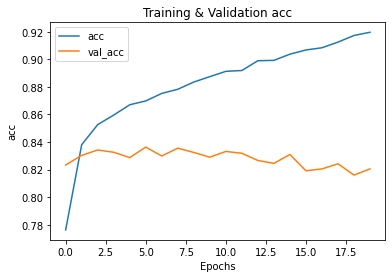

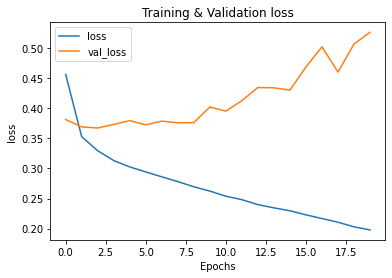

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graphs(history, string) :
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.title('Training & Validation {}'.format(string))
  plt.show()

plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

# Sarcasm with 1D Convolutional Layer

In [16]:
model_sub = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
  tf.keras.layers.Conv1D(128, 5, activation = 'relu'),
  tf.keras.layers.GlobalMaxPooling1D(),
  tf.keras.layers.Dense(24, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')                                 
])

model_sub.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['acc'])

model_sub.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
_________________________________________________________________


In [17]:
history_sub = model_sub.fit(
    padded,
    training_labels,
    epochs = num_epochs,
    validation_data = (testing_padded, testing_labels)
)

Epoch 1/20
625/625 [==============================] - 9s 13ms/step - loss: 0.5700 - acc: 0.6701 - val_loss: 0.4001 - val_acc: 0.8185
Epoch 2/20
625/625 [==============================] - 8s 13ms/step - loss: 0.3540 - acc: 0.8410 - val_loss: 0.3879 - val_acc: 0.8228
Epoch 3/20
625/625 [==============================] - 8s 13ms/step - loss: 0.3205 - acc: 0.8619 - val_loss: 0.3866 - val_acc: 0.8246
Epoch 4/20
625/625 [==============================] - 8s 13ms/step - loss: 0.2836 - acc: 0.8797 - val_loss: 0.4028 - val_acc: 0.8249
Epoch 5/20
625/625 [==============================] - 8s 13ms/step - loss: 0.2582 - acc: 0.8927 - val_loss: 0.4171 - val_acc: 0.8180
Epoch 6/20
625/625 [==============================] - 8s 13ms/step - loss: 0.2273 - acc: 0.9094 - val_loss: 0.4539 - val_acc: 0.8182
Epoch 7/20
625/625 [==============================] - 8s 13ms/step - loss: 0.1955 - acc: 0.9215 - val_loss: 0.4772 - val_acc: 0.8150
Epoch 8/20
625/625 [==============================] - 8s 13ms/step - 

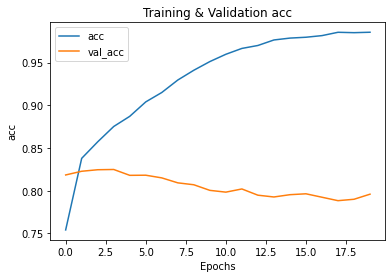

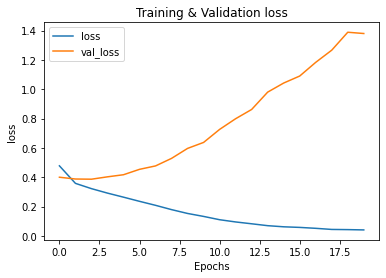

In [18]:
plot_graphs(history_sub, 'acc')
plot_graphs(history_sub, 'loss')